In [2]:
import pandas as pd
import numpy as np
import math
import zipfile
from PIL import Image
from tqdm import tqdm
import pickle
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open("/content/drive/MyDrive/Projeto ML/2022/Aprendizado de Maquinas/Projeto/dataset_VJ.obj", "rb") as f:
    viola_output = pickle.load(f)

In [7]:
dataset = pd.DataFrame(viola_output).T

In [15]:
dataset.columns = ['img', 'viola_jones_success']

In [12]:
def get_labels():
  labels= pd.read_csv('/content/drive/MyDrive/Projeto ML/2022/Aprendizado de Maquinas/Projeto/CelebA/identity_CelebA.txt', header=None)

  labels.rename(columns={0:'id'},inplace=True)

  labels['class'] = labels['id'].apply(lambda x:x.split()[1])
  labels['class'] = labels['class'].astype(int)
  labels['image'] = labels['id'].apply(lambda x:x.split()[0])

  labels.set_index('image', inplace=True)

  return labels

labels = get_labels()

In [14]:
dataset.shape

(60788, 2)

In [18]:
dataset['viola_jones_success'].value_counts()

1    59441
0     1347
Name: viola_jones_success, dtype: int64

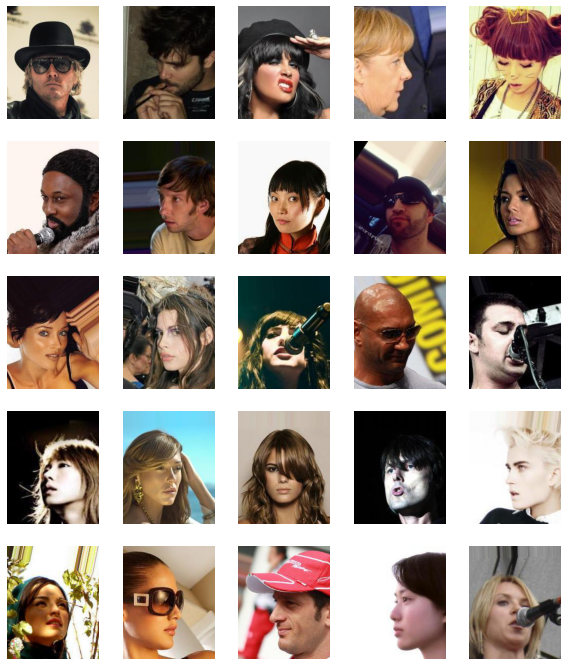

In [23]:
fig, axes = plt.subplots(5,5, figsize=(10,12))

for (i,row), ax in zip(dataset.query('viola_jones_success==0').head(25).iterrows(), axes.ravel()): 
  ax.axis('off')
  ax.imshow(row['img'], cmap=plt.cm.gray)  

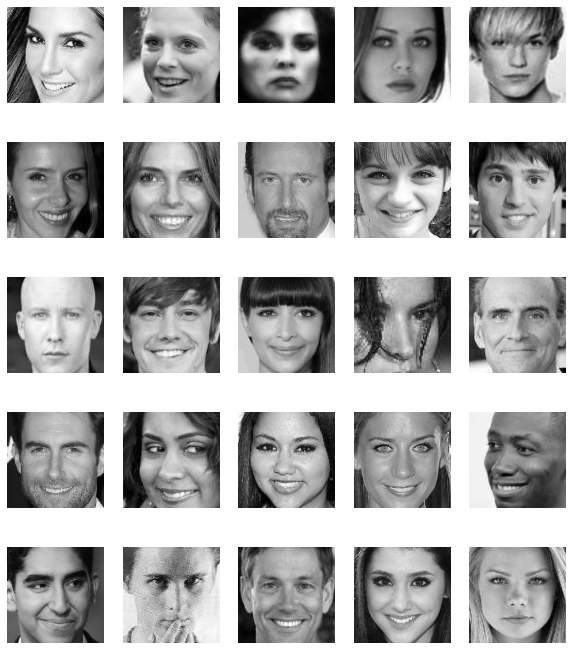

In [24]:
fig, axes = plt.subplots(5,5, figsize=(10,12))

for (i,row), ax in zip(dataset.query('viola_jones_success==1').head(25).iterrows(), axes.ravel()): 
  ax.axis('off')
  ax.imshow(row['img'], cmap=plt.cm.gray)

In [31]:
m_dt_celeb = labels.shape[0]
m_dtwork_raw = dataset[dataset['viola_jones_success']==1].shape[0]

In [38]:
print('Esta sendo utilizado {:.2f}% do dataset ({} instâncias de {}) '.format(100*m_dtwork_raw/m_dt_celeb,m_dtwork_raw, m_dt_celeb))

Esta sendo utilizado 29.34% do dataset (59441 instâncias de 202599) 


In [36]:
dataset = dataset[dataset['viola_jones_success']==1]

In [40]:
dataset = dataset.merge(labels, left_index=True, right_index=True,how='left')

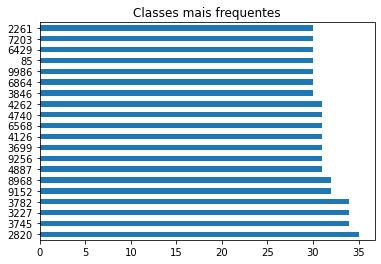

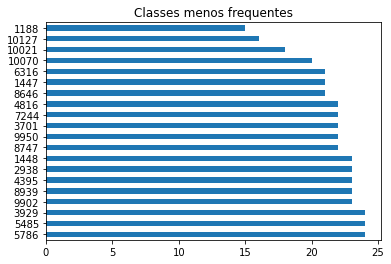

media da quantidade por classe: 29.35358024691358


In [52]:
counts_class = dataset['class'].value_counts()

counts_class.head(20).plot(kind='barh')
plt.title('Classes mais frequentes')
plt.show()

counts_class.tail(20).plot(kind='barh')
plt.title('Classes menos frequentes')
plt.show()

print('media da quantidade por classe:', np.mean(counts_class.values))

In [55]:
dataset.head()

,img,viola_jones_success,id,class
000001.jpg,"[[196, 175, 174, 83, 137, 126, 58, 60, 85, 45,...",1,000001.jpg 2880,2880
000002.jpg,"[[49, 48, 48, 47, 46, 46, 61, 44, 35, 39, 41, ...",1,000002.jpg 2937,2937
000096.jpg,"[[11, 11, 11, 10, 10, 10, 10, 10, 9, 10, 11, 1...",1,000096.jpg 4262,4262
000103.jpg,"[[35, 30, 33, 47, 62, 63, 59, 54, 49, 45, 44, ...",1,000103.jpg 273,273
000105.jpg,"[[241, 231, 179, 129, 106, 73, 59, 86, 79, 51,...",1,000105.jpg 1946,1946


In [1]:
dataset['class'].value_counts()



NameError: ignored